In [2]:
import pandas as pd
from matplotlib import pyplot
import os
data=pd.read_csv('final_movie_details.csv')
data.head(5) 

,Unnamed: 0,movie,year,imdb,metascore,votes,movie decription,movie duration,movie genre
0,0,Logan,(2017),8.1,77,776193,\nIn a future where mutants are nearly extinct...,137 min,"\nAction, Drama, Sci-Fi"
1,1,Thor: Ragnarok,(2017),7.9,74,765234,"\nImprisoned on the planet Sakaar, Thor must r...",130 min,"\nAction, Adventure, Comedy"
2,2,Guardians of the Galaxy Vol. 2,(2017),7.6,67,694115,\nThe Guardians struggle to keep together as a...,136 min,"\nAction, Adventure, Comedy"
3,3,Dunkirk,(2017),7.8,94,672763,"\nAllied soldiers from Belgium, the British Co...",106 min,"\nAction, Drama, History"
4,4,Spider-Man: Homecoming,(2017),7.4,73,669616,\nPeter Parker balances his life as an ordinar...,133 min,"\nAction, Adventure, Sci-Fi"


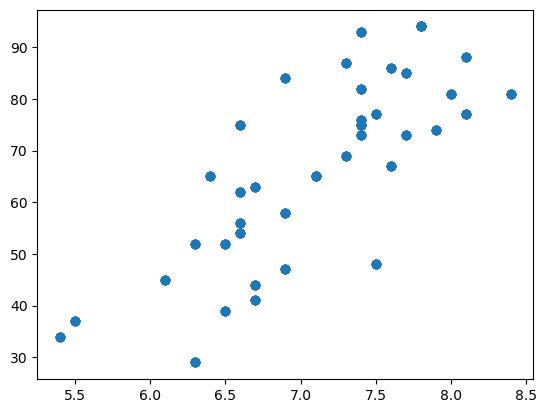

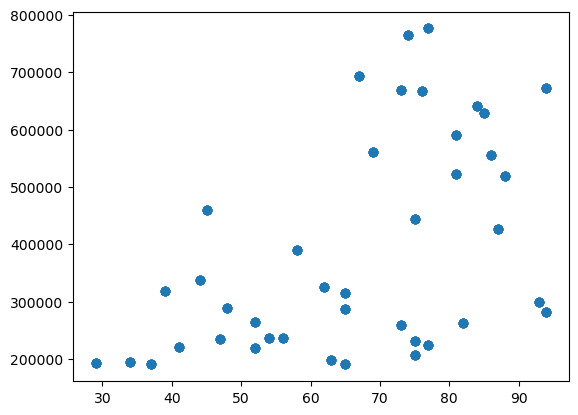

In [3]:
pyplot.scatter(data['imdb'],data['metascore'])
pyplot.show()

pyplot.scatter(data['metascore'],data['votes'])
pyplot.show()

There seems to be direct relation between meta & IMDB scores. 

In [15]:
X = data.loc[:, 'metascore'].values
#X = data.loc[:, ['metascore','votes']].values
y = data.loc[:, 'imdb'].values

import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

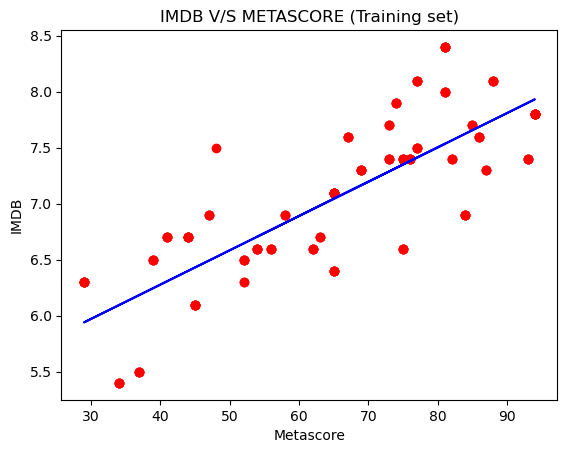

R^2: 0.5241325025437161
MSE: 0.1961537997211049


In [16]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))#to fit the regressor to our training data
y_pred =regressor.predict(X_test.reshape(-1,1))

#Now if we compare y_Pred and y_test we can see the current salary and model predicted salary in y_pred
pyplot.scatter(X_train, y_train, color = 'red')
pyplot.plot(X_train, regressor.predict(X_train.reshape(-1,1)), color = 'blue')
#we have plotted the line where real salary in x axis and
#predicted salary in y axis  and we observe thatfew obs which are on line means its quite accurate i.e. real salary approx equal to predcted salary
pyplot.title('IMDB V/S METASCORE (Training set)')
pyplot.xlabel('Metascore')
pyplot.ylabel('IMDB')
pyplot.show()

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("R^2:", r2_score(y_test, y_pred)) 
print("MSE:", mean_squared_error(y_test, y_pred)) 

Now use meta/scores (multivariate) 

In [24]:
X1 = data.loc[:, ['metascore','votes']].values
y1 = data.loc[:, 'imdb'].values

import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.33, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred =regressor.predict(X_test)

print("R^2:", r2_score(y_test, y_pred)) 
print("MSE:", mean_squared_error(y_test, y_pred)) 

R^2: 0.5914189878961049
MSE: 0.16841813833994063
